In [1]:
from carla_disentanglement.datasets.minigrid import MinigridDataset, MinigridScoreDataset
from carla_disentanglement.datasets.dsprites import DSpritesDataset
import numpy as np

In [2]:
ds = MinigridScoreDataset()

In [ ]:
d= np.random.random((3,4,4))
np.pad(d, ((0,0),(8,8),(8,8)), constant_values=100).shape

(3, 20, 20)

In [3]:
for i in range(ds.num_factors):
    print(ds.labels[:,i].unique())

tensor([1, 2, 3, 4], dtype=torch.int32)
tensor([1, 2, 3, 4], dtype=torch.int32)
tensor([1, 2, 3, 4], dtype=torch.int32)
tensor([1, 2, 3, 4], dtype=torch.int32)
tensor([1, 2, 3, 4], dtype=torch.int32)
tensor([1, 2, 3, 4], dtype=torch.int32)
tensor([ 1,  5,  8, 11, 12, 13, 14, 15, 16, 17], dtype=torch.int32)
tensor([ 1,  5,  8, 11, 12, 13, 14, 15, 16, 17], dtype=torch.int32)


In [4]:
ds.labels.shape

torch.Size([409600, 8])

In [5]:
from disentanglement_lib.evaluation.metrics import beta_vae
from disentanglement_lib.evaluation.metrics import factor_vae 
from disentanglement_lib.evaluation.metrics import dci
from disentanglement_lib.evaluation.metrics import mig

from disentanglement_lib.evaluation.metrics import modularity_explicitness
from disentanglement_lib.evaluation.metrics import sap_score

import gin.tf
gin.parse_config_file("metrics.gin")

ParsedConfigFileIncludesAndImports(filename='metrics.gin', imports=[], includes=[])

In [6]:
def make_representor():
    # Define the representation function
    def _represent(x):
        # assert isinstance(x, np.ndarray), \
        #     "Input to the representation function must be a ndarray."
        # assert x.ndim == 4, \
        #     "Input to the representation function must be a four dimensional NHWC tensor."
        # # Convert from NHWC to NCHW
        # x = np.moveaxis(x, 3, 1)
        # # Convert to torch tensor and evaluate
        # x = torch.from_numpy(x).float().to('cuda' if cuda else 'cpu')
        y = np.random.random((x.shape[0],100))
        assert y.ndim == 2, \
            "The returned output from the representor must be two dimensional (NC)."
        return y

    return _represent

In [7]:
ds.labels[0:2].numpy()

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 5]])

In [8]:
import matplotlib.pyplot as plt

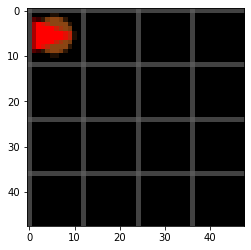

In [9]:
plt.imshow(ds.data[3].permute(1,2,0), interpolation='nearest')
plt.show()  

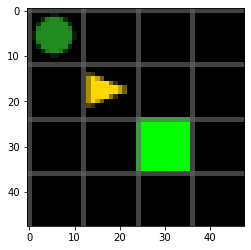

In [15]:
ofromf = ds.sample_observations_from_factors(np.array([[1,2,0,1,2,0,1,4]]), np.random.RandomState(0))
plt.imshow(ofromf[0].permute(1,2,0), interpolation='nearest')
plt.show()  

In [ ]:
random_state = np.random.RandomState(0)
mig.compute_mig(ds,make_representor(), random_state) 

In [ ]:
random_state = np.random.RandomState(0)
sap_score.compute_sap(ds,make_representor(), random_state) 

In [ ]:
random_state = np.random.RandomState(0)
factor_vae.compute_factor_vae(ds, make_representor(), random_state, num_variance_estimate=10000)

In [ ]:
random_state = np.random.RandomState(0)
beta_vae.compute_beta_vae_sklearn(ds, make_representor(), random_state, batch_size=64, num_train=10000, num_eval=5000)

In [ ]:
random_state = np.random.RandomState(0)
dci.compute_dci(ds,make_representor(), random_state) 